<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   time_s       100000 non-null  float64
 1   Vin_V        100000 non-null  float64
 2   Iin_A        100000 non-null  float64
 3   Vout_V       100000 non-null  float64
 4   Iout_A       100000 non-null  float64
 5   Temp_C       100000 non-null  float64
 6   fault_label  100000 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 5.3 MB
None
              time_s     Vin_V          Iin_A         Vout_V         Iout_A  \
count  100000.000000  100000.0  100000.000000  100000.000000  100000.000000   
mean        4.999950       5.0       0.605710       3.296256       0.800039   
std         2.886766       0.0       0.097948       0.042078       0.071425   
min         0.000000       5.0       0.493283       2.821707       0.666540   
25%         2.499975       5.0       0.548063       3.

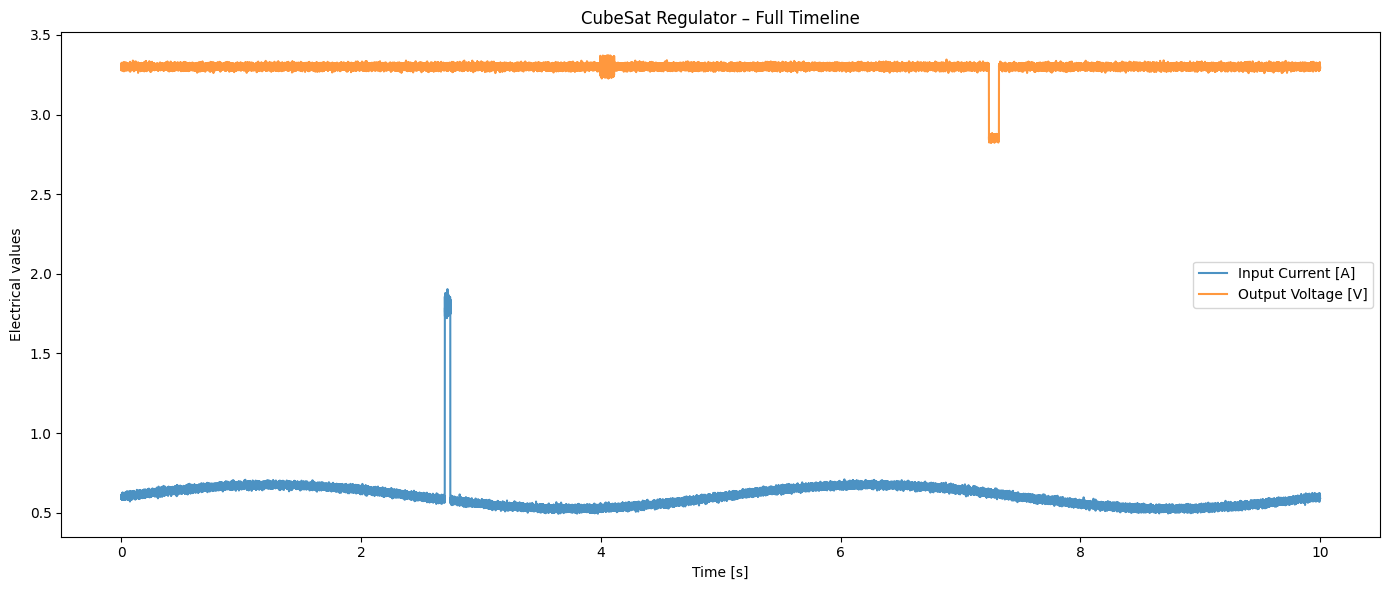

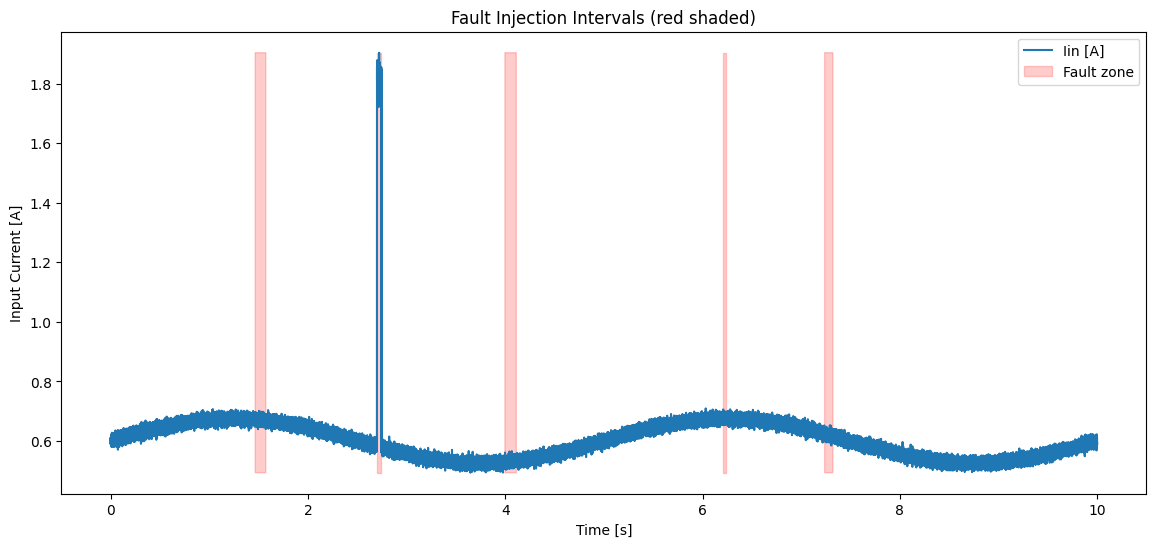

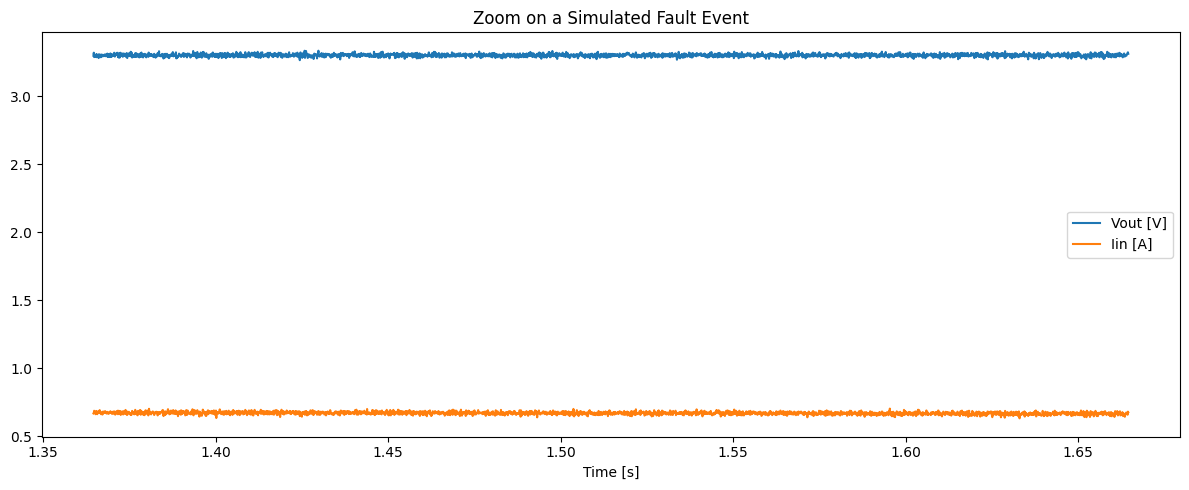

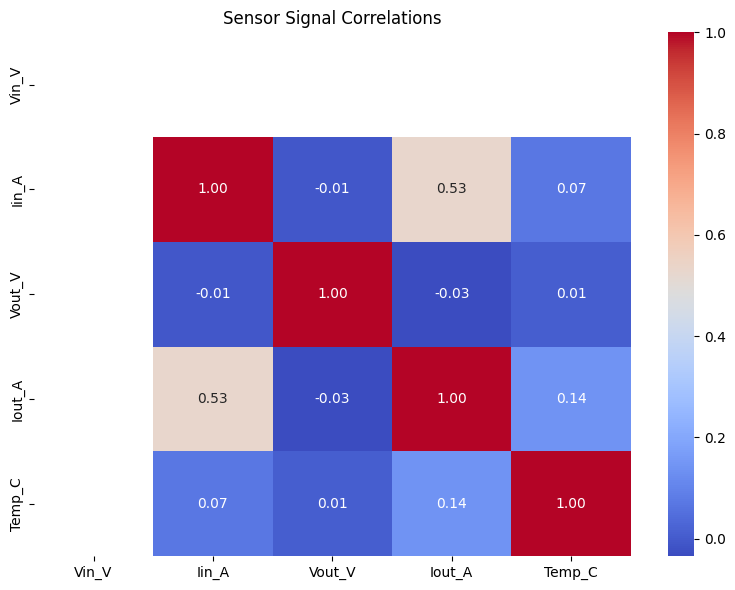

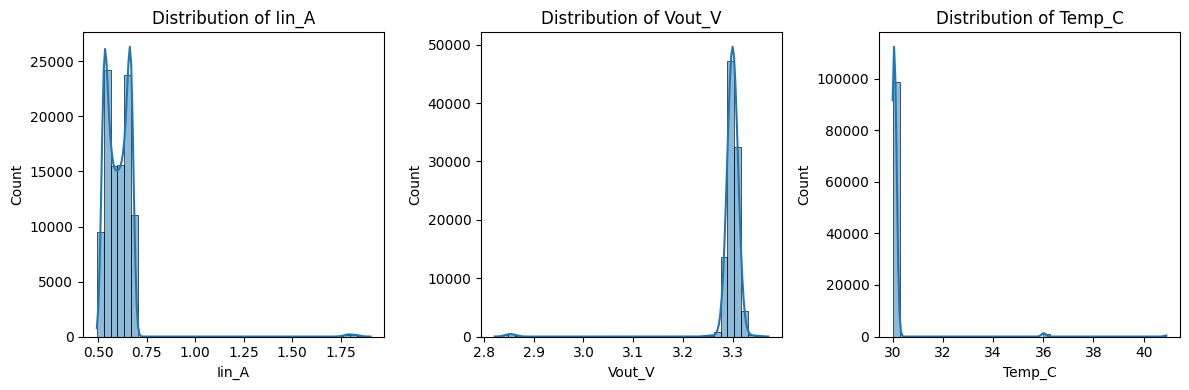

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------
# Load the generated dataset
# -----------------------------
df = pd.read_csv("../data/cubesat_regulator_raw.csv")  # or reuse df if still in memory
print(df.info())
print(df.describe())

# -----------------------------
# 1️⃣ Overview plots (time-series)
# -----------------------------
plt.figure(figsize=(14,6))
plt.plot(df["time_s"], df["Iin_A"], label="Input Current [A]", alpha=0.8)
plt.plot(df["time_s"], df["Vout_V"], label="Output Voltage [V]", alpha=0.8)
plt.xlabel("Time [s]")
plt.ylabel("Electrical values")
plt.title("CubeSat Regulator – Full Timeline")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 2️⃣ Highlight fault intervals
# -----------------------------
plt.figure(figsize=(14,6))
plt.plot(df["time_s"], df["Iin_A"], label="Iin [A]")
plt.fill_between(df["time_s"], df["Iin_A"].min(), df["Iin_A"].max(),
                 where=df["fault_label"]==1, color="r", alpha=0.2, label="Fault zone")
plt.xlabel("Time [s]")
plt.ylabel("Input Current [A]")
plt.title("Fault Injection Intervals (red shaded)")
plt.legend()
plt.show()

# -----------------------------
# 3️⃣ Zoom into one random fault
# -----------------------------
fault_indices = df.index[df["fault_label"]==1]
if len(fault_indices) > 0:
    start_idx = fault_indices[0] - 1000
    end_idx   = fault_indices[0] + 2000
    subset = df.iloc[max(0,start_idx):min(len(df),end_idx)]

    plt.figure(figsize=(12,5))
    plt.plot(subset["time_s"], subset["Vout_V"], label="Vout [V]")
    plt.plot(subset["time_s"], subset["Iin_A"], label="Iin [A]")
    plt.title("Zoom on a Simulated Fault Event")
    plt.xlabel("Time [s]")
    plt.legend()
    plt.tight_layout()
    plt.show()

# -----------------------------
# 4️⃣ Pairwise correlation matrix
# -----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df[["Vin_V","Iin_A","Vout_V","Iout_A","Temp_C"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sensor Signal Correlations")
plt.tight_layout()
plt.show()

# -----------------------------
# 5️⃣ Distribution plots
# -----------------------------
plt.figure(figsize=(12,4))
for i, col in enumerate(["Iin_A", "Vout_V", "Temp_C"], 1):
    plt.subplot(1,3,i)
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [2]:
#shape
print("Dataset shape:", df.shape)

Dataset shape: (100000, 7)
